<a href="https://colab.research.google.com/github/mazibazi/FLAC3D_TunnelExcavation/blob/main/dataPreprocesingSPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
path = '/content/gdrive/MyDrive/Colab Notebooks/dataAnalySPT/soilProSPT.csv'
df = pd.read_csv(path)
df.head()

,Code,DepthUp,DepthDown,Soil,Density,qu,Cu_directshear,Phi_directshear,Cu_triaxial,Phi_triaxial,Cu,Phi,Nspt
0,S1_TI-2C,2.0,2.6,Filling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,S1_TI-2C,9.0,9.6,Clay,1.818,NaN,0.49,23.0,NaN,NaN,0.49,23.00,20.0
2,S1_TI-2C,23.5,24.1,Sand,2.006,2.35,NaN,NaN,0.20,30.31,0.20,30.31,31.0
3,S1_TI-2C,29.5,30.1,Sand,2.050,NaN,0.47,23.5,NaN,NaN,0.47,23.50,NaN
4,S1_TI-2C,40.0,40.6,Marl,2.102,NaN,NaN,NaN,0.44,20.10,0.44,20.10,NaN


In [ ]:
targetSoil = ["Clay", "Sand"]

In [ ]:
df1 = df[df["Soil"].isin(targetSoil)]
df1

,Code,DepthUp,DepthDown,Soil,Density,qu,Cu_directshear,Phi_directshear,Cu_triaxial,Phi_triaxial,Cu,Phi,Nspt
1,S1_TI-2C,9.0,9.6,Clay,1.818,NaN,0.49,23.00,NaN,NaN,0.49,23.00,20.0
2,S1_TI-2C,23.5,24.1,Sand,2.006,2.35,NaN,NaN,0.20,30.31,0.20,30.31,31.0
3,S1_TI-2C,29.5,30.1,Sand,2.050,NaN,0.47,23.50,NaN,NaN,0.47,23.50,NaN
6,S1_TVII-2,7.2,7.8,Clay,2.156,NaN,NaN,NaN,0.18,23.64,0.18,23.64,10.0
7,S1_TVII-2,9.7,10.3,Clay,2.063,NaN,0.52,23.14,NaN,NaN,0.52,23.14,NaN
8,S1_TVII-2,14.0,14.6,Sand,1.875,NaN,0.26,24.42,NaN,NaN,0.26,24.42,27.0
14,S5_TIII-1B,7.6,8.2,Clay,1.965,NaN,0.36,25.46,NaN,NaN,0.36,25.46,32.0
15,S5_TIII-1B,13.0,13.6,Sand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0
16,S5_TIII-1B,19.0,19.6,Sand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0
19,S2_TI-1b,6.0,6.6,Clay,NaN,NaN,0.05,26.64,NaN,NaN,0.05,26.64,NaN


In [ ]:
df1.shape

(55, 13)

precent of Null SPT for Sand and Clay

In [ ]:
sum(df1["Nspt"].isna())/df1.shape[0]*100

41.81818181818181

In [ ]:
sum(df1["Cu"].isna())/df1.shape[0]*100

47.27272727272727

Finding a data which we do not have "Nspt" and "Cu"

```python
sum(df1["Nspt"].isnull() & df1["Cu"].isnull())
```

percent of not usfull data

In [ ]:
print(sum(df1["Nspt"].isnull() & df1["Cu"].isnull())/df1.shape[0]*100)
print(sum(df1["Nspt"].isnull() & df1["Cu"].isnull()))

14.545454545454545
8


In [ ]:
df1[df1["Nspt"].isnull() & df1["Cu"].isnull()]

,Code,DepthUp,DepthDown,Soil,Density,qu,Cu_directshear,Phi_directshear,Cu_triaxial,Phi_triaxial,Cu,Phi,Nspt
43,S4_TVI-1,4.0,4.6,Clay,0.850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,S1_TVIII-1,8.0,8.6,Sand,1.868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,S3_TVIII-1,14.0,14.6,Clay,1.888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,S8_TVII-2,16.0,16.6,Sand,2.150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,S2_TV-2,4.0,4.6,Clay,1.840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,S3_TV-2,7.0,7.6,Sand,2.010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,S9_TVII-2,10.0,10.6,Sand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,S10_TVII-2,10.0,10.6,Sand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Percent of complete data

In [ ]:
print(sum(df1["Nspt"].notnull() & df1["Cu"].notnull())/df1.shape[0]*100)
print(sum(df1["Nspt"].notnull() & df1["Cu"].notnull()))

25.454545454545453
14


In [ ]:
dfComplete= df1[df1["Nspt"].notnull() & df1["Cu"].notnull()]

One of SPT or Cu are missed

In [ ]:
print(sum(df1["Nspt"].isnull() | df1["Cu"].isnull())/df1.shape[0]*100)
print(sum(df1["Nspt"].isnull() | df1["Cu"].isnull()))

74.54545454545455
41


tunnels would be excavated in Sand or Clay

In [ ]:
dfComplete

,Code,DepthUp,DepthDown,Soil,Density,qu,Cu_directshear,Phi_directshear,Cu_triaxial,Phi_triaxial,Cu,Phi,Nspt
1,S1_TI-2C,9.0,9.6,Clay,1.818,NaN,0.49,23.00,NaN,NaN,0.49,23.00,20.0
2,S1_TI-2C,23.5,24.1,Sand,2.006,2.35,NaN,NaN,0.20,30.31,0.20,30.31,31.0
6,S1_TVII-2,7.2,7.8,Clay,2.156,NaN,NaN,NaN,0.18,23.64,0.18,23.64,10.0
8,S1_TVII-2,14.0,14.6,Sand,1.875,NaN,0.26,24.42,NaN,NaN,0.26,24.42,27.0
14,S5_TIII-1B,7.6,8.2,Clay,1.965,NaN,0.36,25.46,NaN,NaN,0.36,25.46,32.0
38,S6_TIII-1b,12.0,12.6,Sand,NaN,NaN,0.52,31.93,NaN,NaN,0.52,31.93,20.0
53,SP16,5.0,5.6,Clay,1.960,NaN,0.42,20.39,NaN,NaN,0.42,20.39,16.0
61,SP17,11.0,11.6,Clay,NaN,NaN,0.13,20.03,NaN,NaN,0.13,20.03,14.0
68,S1_TVIII-1,19.5,20.1,Sand,1.993,NaN,NaN,NaN,0.52,17.89,0.52,17.89,27.0
73,S2_TVII-2,4.0,4.6,Clay,2.006,NaN,0.33,23.78,NaN,NaN,0.33,23.78,20.0


In [ ]:
dfComplete[dfComplete["DepthDown"]>15]

,Code,DepthUp,DepthDown,Soil,Density,qu,Cu_directshear,Phi_directshear,Cu_triaxial,Phi_triaxial,Cu,Phi,Nspt
2,S1_TI-2C,23.5,24.1,Sand,2.006,2.35,NaN,NaN,0.20,30.31,0.20,30.31,31.0
68,S1_TVIII-1,19.5,20.1,Sand,1.993,NaN,NaN,NaN,0.52,17.89,0.52,17.89,27.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

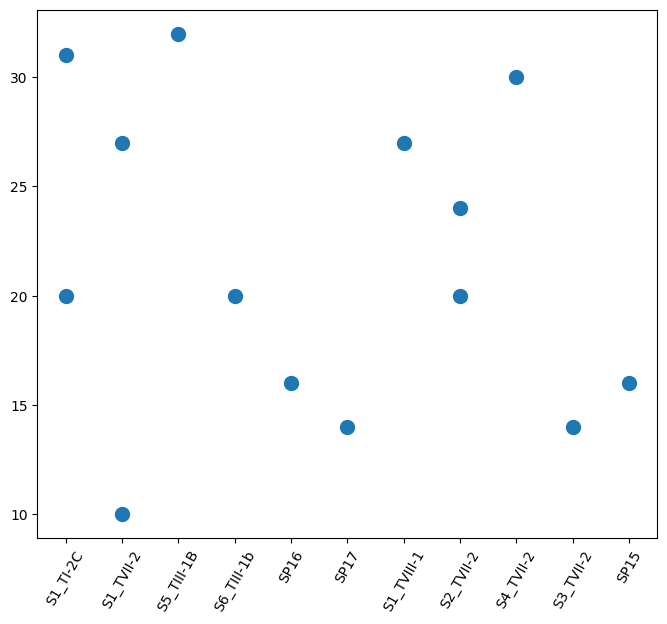

In [ ]:
plt.figure(figsize=(8,7), dpi = 100)
plt.scatter(dfComplete["Code"],dfComplete["Nspt"], s = 100)
plt.xticks(rotation=60)

In [ ]:
fig = go.Figure(data=go.Scatter(x=dfComplete['Code'],
                                y=dfComplete['Nspt'],
                                mode='markers',
                                marker_color=dfComplete['Nspt'],
                                text=dfComplete['Code'])) # hover text goes here
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.update_layout(title='Location Vs Nspt in Seville for Selected data',xaxis_title="Location",
                   yaxis_title="NSPT",
                  font=dict(
                  family="Courier New, monospace",
                  size=18,
                  color="RebeccaPurple"
                  ))
fig.show()

In [ ]:
fig = go.Figure(data=go.Scatter(x=df1['Code'],
                                y=df1['Nspt'],
                                mode='markers',
                                marker_color=df1['Nspt'],
                                text=df1['Code'])) # hover text goes here
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.update_layout(title='Location Vs Nspt in Seville for All data(55)',xaxis_title="Location",
                   yaxis_title="NSPT",
                  font=dict(
                  family="Courier New, monospace",
                  size=18,
                  color="RebeccaPurple"
                  ))
fig.show()

In [ ]:
fig = go.Figure(data=go.Scatter(x=dfComplete['Code'],
                                y=dfComplete['Cu'],
                                mode='markers',
                                marker_color=dfComplete['Cu'],
                                text=dfComplete['Code'])) # hover text goes here
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.update_layout(title='Location Vs Cohession in Seville for Selected data',xaxis_title="Location",
                   yaxis_title="Cohession",
                  font=dict(
                  family="Courier New, monospace",
                  size=18,
                  color="RebeccaPurple"
                  ))
fig.show()

In [ ]:
fig = go.Figure(data=go.Scatter(x=df1['Code'],
                                y=df1['Cu'],
                                mode='markers',
                                marker_color=df1['Cu'],
                                text=df1['Code'])) # hover text goes here
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.update_layout(title='Location Vs Cohession in Seville for All data(55)',xaxis_title="Location",
                   yaxis_title="Cohession",
                  font=dict(
                  family="Courier New, monospace",
                  size=18,
                  color="RebeccaPurple"
                  ))
fig.show()

In [ ]:
fig = go.Figure(data=go.Scatter(x=dfComplete['Code'],
                                y=dfComplete['Phi'],
                                mode='markers',
                                marker_color=dfComplete['Phi'],
                                text=dfComplete['Code'])) # hover text goes here
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.update_layout(title='Location Vs Friction angle in Seville for Selected data',xaxis_title="Location",
                   yaxis_title="Friction angle",
                  font=dict(
                  family="Courier New, monospace",
                  size=18,
                  color="RebeccaPurple"
                  ))
fig.show()

In [ ]:
fig = go.Figure(data=go.Scatter(x=df1['Code'],
                                y=df1['Phi'],
                                mode='markers',
                                marker_color=df1['Phi'],
                                text=df1['Code'])) # hover text goes here
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.update_layout(title='Location Vs Friction angle in Seville for All data(55)',xaxis_title="Location",
                   yaxis_title="Friction angle",
                  font=dict(
                  family="Courier New, monospace",
                  size=18,
                  color="RebeccaPurple"
                  ))
fig.show()

In [ ]:
fig = go.Figure(data=go.Scatter(x=dfComplete['Cu'],
                                y=dfComplete['Nspt'],
                                mode='markers',
                                marker_color=dfComplete['Nspt'],
                                text=dfComplete['Code'])) # hover text goes here
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.update_layout(title='Cu Vs Nspt in Seville for Selected data',xaxis_title="Cohession",
                   yaxis_title="NSPT",
                  font=dict(
                  family="Courier New, monospace",
                  size=18,
                  color="RebeccaPurple"
                  ))
fig.show()

In [ ]:
fig = go.Figure(data=go.Scatter(x=df1['Cu'],
                                y=df1['Nspt'],
                                mode='markers',
                                marker_color=df1['Phi'],
                                text=df1['Code'])) # hover text goes here
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.update_layout(title='Cu and Phi Vs Nspt in Seville for All data(55)',xaxis_title="Cohession",
                   yaxis_title="NSPT",
                  font=dict(
                  family="Courier New, monospace",
                  size=18,
                  color="RebeccaPurple"
                  ))
fig.show()

In [ ]:
fig = go.Figure(data=go.Scatter3d(x=dfComplete['Cu'],
                                y=dfComplete['Nspt'],
                                z =dfComplete['Code'], 
                                mode='markers',
                                marker_color=dfComplete['Nspt'],
                                text=dfComplete['Code']))
fig.update_traces(marker=dict(size=8,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.update_layout(title='Cu Vs Nspt in Seville for Complete data',xaxis_title="Cohession",
                   yaxis_title="NSPT",
                  font=dict(
                  family="Courier New, monospace",
                  size=10,
                  color="RebeccaPurple"
                  ))
fig.show()

# Data stastics

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 1 to 130
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Code             55 non-null     object 
 1   DepthUp          55 non-null     float64
 2   DepthDown        55 non-null     float64
 3   Soil             55 non-null     object 
 4   Density          29 non-null     float64
 5   qu               1 non-null      float64
 6   Cu_directshear   26 non-null     float64
 7   Phi_directshear  26 non-null     float64
 8   Cu_triaxial      3 non-null      float64
 9   Phi_triaxial     3 non-null      float64
 10  Cu               29 non-null     float64
 11  Phi              29 non-null     float64
 12  Nspt             32 non-null     float64
dtypes: float64(11), object(2)
memory usage: 6.0+ KB


In [ ]:
df1.describe().applymap('{:,.2f}'.format)


,DepthUp,DepthDown,Density,qu,Cu_directshear,Phi_directshear,Cu_triaxial,Phi_triaxial,Cu,Phi,Nspt
count,55.00,55.00,29.00,1.00,26.00,26.00,3.00,3.00,29.00,29.00,32.00
mean,10.78,11.37,1.94,2.35,0.40,23.30,0.30,23.95,0.39,23.36,24.53
std,5.58,5.58,0.23,nan,0.25,7.48,0.19,6.22,0.25,7.27,13.97
min,4.00,4.60,0.85,2.35,0.05,3.50,0.18,17.89,0.05,3.50,4.00
25%,7.00,7.60,1.90,2.35,0.19,20.12,0.19,20.77,0.19,20.03,16.00
50%,10.00,10.60,1.97,2.35,0.39,23.64,0.20,23.64,0.36,23.64,22.00
75%,14.00,14.60,2.02,2.35,0.53,27.77,0.36,26.98,0.52,27.80,30.25
max,29.50,30.10,2.16,2.35,1.12,33.53,0.52,30.31,1.12,33.53,80.00


In [ ]:
df1.iloc[:,[4,-1,-2,-3]].describe().applymap('{:,.2f}'.format)

,Density,Nspt,Phi,Cu
count,29.00,32.00,29.00,29.00
mean,1.94,24.53,23.36,0.39
std,0.23,13.97,7.27,0.25
min,0.85,4.00,3.50,0.05
25%,1.90,16.00,20.03,0.19
50%,1.97,22.00,23.64,0.36
75%,2.02,30.25,27.80,0.52
max,2.16,80.00,33.53,1.12


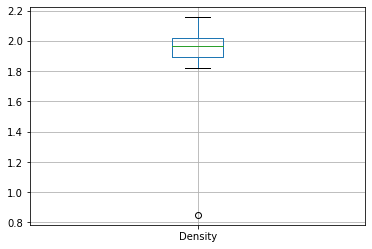

In [ ]:
df1.boxplot(column=['Density'])

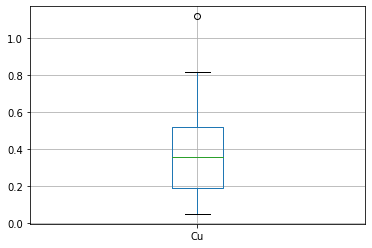

In [ ]:
df1.boxplot(column=['Cu'])

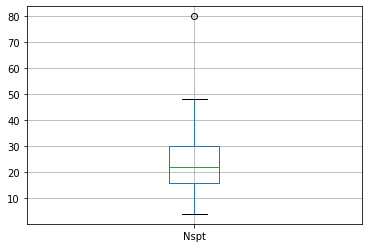

In [ ]:
df1.boxplot(column=['Nspt'])

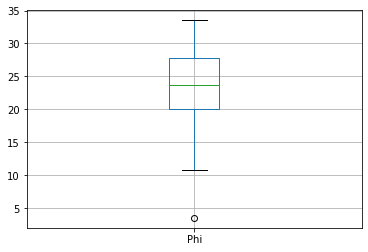

In [ ]:
df1.boxplot(column=['Phi'])